 # Comparación de Precios con el Modelo Black-Scholes y Precios de Mercado

## Introducción

La ecuación de Black-Scholes, es un modelo usado en las matemáticas financieras para determinar el precio de determinados derivados financieros. Dicha ecuación se basa ampliamente en la teoría de procesos estocásticos en particular modela variaciones de precios como un proceso de Wiener. 
Este modelo fue empleado para estimar el valor actual de una opción europea para la compra (Call), o venta (Put), de acciones en una fecha futura.

## Problema

El proyecto se enfoca en validar mediante Black-Scholes que los precios de las opciones en el mercado se aproximan a los valores calculados por dicho modelo(dando un cierto intervalo de confianza).

Para la validación se tomará una muestra de 3 activos del S&P 500 (un indice de EE.UU.) y otra muestra de 3 activos del IPC (un indice de México).

Se analizaran los precios de las opciones de Lala, American Movil y Cemex que pertenecen al IPC; y a su vez se analizaran los precios de las opciones de Ford, Anthem y Discovery que pertenecen al S&P 500. Todas las opciones fueron valuadas el día 15 de noviembre de 2018 y vencen el 21 de diciembre de 2018.

## Definiciones clave
* Rendimiento: Es la ganacia o pérdida relativa del precio de un activo. El rendimiento está dado por lo sigueinte fórmula, donde $r_{t}$ es el rendimiento logarítmico en el tiempo $t$, $S_{t}$ es el precio del activo subyacente en el tiempo $t$ y $S_{t-1}$ es el precio del activo subyacente en el tiempo $t-1$.

$$r_{t} = ln\left(\frac{S_{t}}{S_{t-1}}\right)$$

* Volatilidad implícita: el la volatilidad esperada a futuro de un activo .
* Volatilidad explicita: el la volatilidad histórica de un activo.

## Supuestos del modelo de Black-Scholes

* No hay costes de transacción o impuestos.
* La tasa de interés libre de riesgo es constante para todos los vencimientos. 
* La acción no paga dividendos.
* La volatilidad se mantiene constante.
* Se permite la venta en corto.
* No hay oportunidades de arbitraje sin riesgo.
* Asume que la distribución de probabilidad de los rendimientos siguen una distribución normal.

La Ecuación de Black-Scholes, describe el comportamiento de un derivado financiero como el de las opciones a lo largo del tiempo.

$$\frac{\partial \mathrm F_{t}}{ \partial \mathrm t }
	+ \mathrm r \mathrm S_{t} \frac{\partial \mathrm F_{t}}{\partial \mathrm S_{t}}\ + \frac{1}{2}\sigma^{2} \mathrm S_{t}^{2} \frac{\partial^{2} \mathrm F_{t}}{\partial \mathrm S_{}t^{2}} =
	\mathrm r \mathrm F_{t} $$

## Formula de Valuación

* $C_{t}$ = Precio de compra de la opción hoy
* $P_{t}$ = Precio de venta de la opción hoy
* T = fecha de vencimiento de la opción
* t = fecha de inicio de la opción
* $\tau$ = T - t
* r =  tasa de interés libre de riesgo.
* $\sigma$ = volatilidad (desviación estándar de los rendimientos logarítmicos del activo subyacente).
* K = Precio de ejercicio de la opción
* $S_{t}$ = Precio de la acción en T=0 
* $N$($d_{1}$ y $d_{2}$) = Valor de la función de probabilidad acumulada de una distribución normal con media 0 y desviación estándar 1, donde $d_{1}$ y $d_{2}$ son:


$$\mathrm d_1= \frac{1}{\sigma \sqrt{\mathrm \tau}} \left[\ln{\left(\frac{S_{t}}{K}\right)} + t\left(r + \frac{\sigma^2}{2}\right) \right]$$

$$\mathrm d_2= \frac{1}{\sigma \sqrt{\mathrm \tau}} \left[\ln{\left(\frac{S_{t}}{K}\right)} + t\left(r - \frac{\sigma^2}{2}\right) \right]$$

$$N(d)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{d} \mathrm e^{-\frac{1}{2}z^2} dz$$

#### Fórmula Black-Scholes para la valuación de la opción europea tipo Call:

$$\mathrm C_{t}= \mathrm N(\mathrm d_1)\mathrm S_{t} - \mathrm N(\mathrm d_2) \mathrm K \mathrm e^{-r \tau}$$
 
#### Fórmula Black-Scholes para la valuación de la opción europea tipo Put:
$$\mathrm P_{t} = \mathrm N(\mathrm -d_2) \mathrm K \mathrm e^{-r \tau} - \mathrm N(\mathrm -d_1)\mathrm S_{t}$$

## Varianza de la Valuación Neutral al Riesgo de la Opción Europea tipo CALL
La Varianza de de la opción europea tipo Call, está dada por la siguiente fórmula:
$$Var[C_{t}] = E[C_{t}^2] - E[C_{t}]^2$$
por tanto siguiendo las variables previamente definidas, para su cálculo se tiene que:
$$ F_{T}= \left\{ \begin{array}{lcc}
             (S_{T} - K)^2 &   si  & ln(S_{T})> ln(K) \\
             \\ 0 &  si & ln(S_{T}) \leq ln(K) \\
             \end{array}
   \right.$$



$$ \mathrm E[C_{t}^2] =\int_{ln(K)}^{\infty }S_{T}^{2} p(x)dx-\int_{ln(K)}^{\infty }2S_{T} K p(x)dx+\int_{ln(K)}^{\infty }K^{2}p(x)dx$$
donde se define que:
* $p(x)$ es la densidad de $x$.
* $S_{T} = e^{x}$
* $z = \frac{x-ln(S_{T}) - (r+(\frac{\sigma^{2}}{2})) \tau}{\sigma \sqrt{\tau}}$ 
* $x = z \sigma \sqrt{\tau} + ln(S_{T}) + (r+(\frac{\sigma^{2}}{2}))$
* $dz\frac{dx}{\sigma \sqrt{\tau}}$

### Resolviendo la primera integral:
Se hace un cambio de variable, de x a z, por tanto:
* Si $x = ln(K)$, entonces $z= -d_{1}$
* Si $x = \infty$, entonces $z = \infty$

$$ \int_{ln(K)}^{\infty }S_{T}^{2} p(x)dx = \frac{1}{\sqrt{2 \pi}} \int_{-d_{1}}^{\infty} e^{2[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2}} dz $$

resolviendo el exponente en la integral:
$$2[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2} $$

$$ 2ln(S_{T}) -\frac{1}{2}[z^2-4z{\sigma}{\sqrt{\tau}}-4r{\tau}-\frac{4}{2}{\sigma^2}{\tau}]$$

$$ 2ln(S_{T}) + 2r{\tau}-\frac{1}{2}[z^2-4z{\sigma}{\sqrt{\tau}}-2{\sigma^2}{\tau}+6{\sigma^2}{\tau}-6{\sigma^2}{\tau}]$$

$$ 2ln(S_{T}) + 2r{\tau} -\frac{1}{2}[z^2-2z{\sigma}{\sqrt{\tau}}]^{2}+3{\sigma^2}\tau$$

se define $y = z - 2 \sigma \sqrt{\tau}$ y por tanto $dy = dz$, entonces:
* Si $z = -d_{1}$, entonces $y= -d_{1}$
* Si $z = \infty$, entonces $y = \infty$

$$\mathrm e^{2ln(S_{T})}*\mathrm e^{2r{\tau}}*\mathrm e^{3{\sigma^2}{\tau}}*\frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{d_{1}}\mathrm e^{-\frac{1}{2}y^2} dy = S_{T}^{2}\mathrm e^{2r{\tau}}\mathrm e^{3{\sigma^2}{\tau}}N(d_{1})$$

### Resolviendo la segunda integral:
Se hace un cambio de variable, de x a z, por tanto:
* Si $x = ln(K)$, entonces $z= -d_{1}$
* Si $x = \infty$, entonces $z = \infty$

$$ - \int_{ln(K)}^{\infty }2 S_{T} K p(x)dx = \frac{-2k}{\sqrt{2 \pi}} \int_{-d_{1}}^{\infty} e^{[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2}} dz $$

resolviendo el exponente en la integral:
$$[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2} $$

$$ ln(S_{T}) -\frac{1}{2}[z^2-2z{\sigma}{\sqrt{\tau}}-2r{\tau}-\frac{2}{2}{\sigma^2}{\tau}]$$

$$ ln(S_{T}) + r{\tau}-\frac{1}{2}[z^{2}-2z{\sigma}{\sqrt{\tau}}-{\sigma^2}{\tau}]$$

$$ ln(S_{T}) + r{\tau} -\frac{1}{2}[z-{\sigma}{\sqrt{\tau}}]^{2}$$

se define $y = z - 2 \sigma \sqrt{\tau}$ y por tanto $dy = dz$, entonces:
* Si $z = -d_{1}$, entonces $y= -d_{1}$
* Si $z = \infty$, entonces $y = \infty$

$$\mathrm e^{ln(S_{T})}*\mathrm e^{r{\tau}}\frac{-2K}{\sqrt{2 \pi}}\int_{-\infty}^{d_{1}}\mathrm e^{-\frac{1}{2}y^2} dy = -2 S_{T} K \mathrm e^{r{\tau}}N(d_{1})$$

### Resolviendo la tercer integral:
Se hace un cambio de variable, de x a z, por tanto:
* Si $x = ln(K)$, entonces $z= -d_{1}$
* Si $x = \infty$, entonces $z = \infty$

$$ \int_{ln(K)}^{\infty } K^{2} p(x)dx = \frac{k^{2}}{\sqrt{2 \pi}} \int_{-d_{1}}^{\infty} e^{\frac{-z^{2}}{2}} dz $$

se define $y = z - 2 \sigma \sqrt{\tau}$ y por tanto $dy = dz$, entonces:
* Si $z = -d_{1}$, entonces $y= -d_{2}$
* Si $z = \infty$, entonces $y = \infty$

$$\frac{K^2}{\sqrt{2\pi}}\int_{-\infty}^{d_{2}} \mathrm e^{\frac{-y^2}{2}}dy = k^{2}N(d_{2}) $$

### Aplicando VNR a los resultados de las 3 integrales anteriores se tiene que:
$$ E[C_{t}^{2}] = S_{t}^{2} e^{{\sigma}{\tau}}N(d_{1})- 2KS_{T} e^{-r{\tau}}N(d_{1})+ k^2 e^{-2r{\tau}} N(d_{2}) $$
usando los factores de descuento $e^{-2r \tau}$ y $e^{-2 \sigma \tau}$.


Recordando que la Varianza está dada por
$$ Var(C_{t}) = E[C_{t}^{2}]-E[C_{t}]^2$$

y que $C_{t} = S_{t} N( d_{1}) -   K e^{-r \tau} N( d_{2})$, se tiene que:

$$ E[C_{t}]^{2} =  S_{t}^{2} N( d_{1})^{2} - 2S_{t}K e^{-r \tau} N( d_{1})N( d_{2}) + K^{2} e^{-2r \tau} N( d_{2})^{2}$$

finalmente, se puede llegar a que:

$$Var[C_{t}] = [S_{t}^{2} e^{{\sigma}{\tau}}N(d_{1})- 2KS_{T} e^{-r{\tau}}N(d_{1})+ k^2 e^{-2r{\tau}} N(d_{2})] - [S_{t}^{2} N( d_{1})^{2} - 2S_{t}K e^{-r \tau} N( d_{1})N( d_{2}) + K^{2} e^{-2r \tau} N( d_{2})^{2}]$$

## Varianza de la Valuación Neutral al Riesgo de la Opción Europea tipo PUT
La Varianza de de la opción europea tipo Put, está dada por la siguiente fórmula:
$$Var[P_{t}] = E[P_{t}^2] - E[P_{t}]^2$$
por tanto siguiendo las variables previamente definidas, para su cálculo se tiene que:
$$ F_{T}= \left\{ \begin{array}{lcc}
             (k - S_{T})^2 &   si  & ln(S_{T})< ln(K) \\
             \\ 0 &  si & ln(S_{T}) \geq ln(K) \\
             \end{array}
   \right.$$



$$ \mathrm E[P_{t}^2] =\int_{ln(K)}^{\infty }S_{T}^{2} p(x)dx-\int_{ln(K)}^{\infty }2S_{T} K p(x)dx+\int_{ln(K)}^{\infty }K^{2}p(x)dx$$
donde se define que:
* $p(x)$ es la densidad de $x$.
* $S_{T} = e^{x}$
* $z = \frac{x-ln(S_{T}) - (r+(\frac{\sigma^{2}}{2})) \tau}{\sigma \sqrt{\tau}}$ 
* $x = z \sigma \sqrt{\tau} + ln(S_{T}) + (r+(\frac{\sigma^{2}}{2}))$
* $dz\frac{dx}{\sigma \sqrt{\tau}}$

### Resolviendo la primera integral:
Se hace un cambio de variable, de x a z, por tanto:
* Si $x = ln(K)$, entonces $z= d_{1}$
* Si $x = \infty$, entonces $z = \infty$

$$ \int_{ln(K)}^{\infty }S_{T}^{2} p(x)dx = \frac{1}{\sqrt{2 \pi}} \int_{d_{1}}^{\infty} e^{2[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2}} dz $$

resolviendo el exponente en la integral:
$$2[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2} $$

$$ 2ln(S_{T}) -\frac{1}{2}[z^2-4z{\sigma}{\sqrt{\tau}}-4r{\tau}-\frac{4}{2}{\sigma^2}{\tau}]$$

$$ 2ln(S_{T}) + 2r{\tau}-\frac{1}{2}[z^2-4z{\sigma}{\sqrt{\tau}}-2{\sigma^2}{\tau}+6{\sigma^2}{\tau}-6{\sigma^2}{\tau}]$$

$$ 2ln(S_{T}) + 2r{\tau} -\frac{1}{2}[z^2-2z{\sigma}{\sqrt{\tau}}]^{2}+3{\sigma^2}\tau$$

se define $y = z - 2 \sigma \sqrt{\tau}$ y por tanto $dy = dz$, entonces:
* Si $z = d_{1}$, entonces $y= d_{1}$
* Si $z = \infty$, entonces $y = \infty$

$$\mathrm e^{2ln(S_{T})}*\mathrm e^{2r{\tau}}*\mathrm e^{3{\sigma^2}{\tau}}*\frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{-d_{1}}\mathrm e^{-\frac{1}{2}y^2} dy = S_{T}^{2}\mathrm e^{2r{\tau}}\mathrm e^{3{\sigma^2}{\tau}}N(-d_{1})$$

### Resolviendo la segunda integral:
Se hace un cambio de variable, de x a z, por tanto:
* Si $x = ln(K)$, entonces $z= d_{1}$
* Si $x = \infty$, entonces $z = \infty$

$$ - \int_{ln(K)}^{\infty }2 S_{T} K p(x)dx = \frac{-2k}{\sqrt{2 \pi}} \int_{d_{1}}^{\infty} e^{[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2}} dz $$

resolviendo el exponente en la integral:
$$[z \sigma \sqrt{\tau} + ln(S_{T}) + (r+\frac{\sigma^{2}}{2})\tau] - \frac{z^{2}}{2} $$

$$ ln(S_{T}) -\frac{1}{2}[z^2-2z{\sigma}{\sqrt{\tau}}-2r{\tau}-\frac{2}{2}{\sigma^2}{\tau}]$$

$$ ln(S_{T}) + r{\tau}-\frac{1}{2}[z^{2}-2z{\sigma}{\sqrt{\tau}}-{\sigma^2}{\tau}]$$

$$ ln(S_{T}) + r{\tau} -\frac{1}{2}[z-{\sigma}{\sqrt{\tau}}]^{2}$$

se define $y = z - 2 \sigma \sqrt{\tau}$ y por tanto $dy = dz$, entonces:
* Si $z = d_{1}$, entonces $y= d_{1}$
* Si $z = \infty$, entonces $y = \infty$

$$\mathrm e^{ln(S_{T})}*\mathrm e^{r{\tau}}\frac{-2K}{\sqrt{2 \pi}}\int_{-\infty}^{-d_{1}}\mathrm e^{-\frac{1}{2}y^2} dy = -2 S_{T} K \mathrm e^{r{\tau}}N(-d_{1})$$

### Resolviendo la tercer integral:
Se hace un cambio de variable, de x a z, por tanto:
* Si $x = ln(K)$, entonces $z= d_{1}$
* Si $x = \infty$, entonces $z = \infty$

$$ \int_{ln(K)}^{\infty } K^{2} p(x)dx = \frac{k^{2}}{\sqrt{2 \pi}} \int_{-d_{1}}^{\infty} e^{\frac{-z^{2}}{2}} dz $$

se define $y = z - 2 \sigma \sqrt{\tau}$ y por tanto $dy = dz$, entonces:
* Si $z = d_{1}$, entonces $y= d_{2}$
* Si $z = \infty$, entonces $y = \infty$

$$\frac{K^2}{\sqrt{2\pi}}\int_{-\infty}^{-d_{2}} \mathrm e^{\frac{-y^2}{2}}dy = k^{2}N(-d_{2}) $$

### Aplicando VNR a los resultados de las 3 integrales anteriores se tiene que:
$$ E[P_{t}^{2}] = S_{t}^{2} e^{{\sigma}{\tau}}N(-d_{1})- 2KS_{T} e^{-r{\tau}}N(-d_{1})+ k^2 e^{-2r{\tau}} N(-d_{2}) $$
usando los factores de descuento $e^{-2r \tau}$ y $e^{-2 \sigma \tau}$.


Recordando que la Varianza está dada por
$$ Var(P_{t}) = E[P_{t}^{2}]-E[P_{t}]^2$$

y que $P_{t} = K e^{-r \tau} N( -d_{2}) - S_{t} N( -d_{1}) $, se tiene que:

$$ E[P_{t}]^{2} =  S_{t}^{2} N( -d_{1})^{2} - 2S_{t}K e^{-r \tau} N( -d_{1})N( -d_{2}) + K^{2} e^{-2r \tau} N( -d_{2})^{2}$$

finalmente, se puede llegar a que:

$$Var[P_{t}] = [S_{t}^{2} e^{{\sigma}{\tau}}N(-d_{1})- 2KS_{T} e^{-r{\tau}}N(-d_{1})+ k^2 e^{-2r{\tau}} N(-d_{2})] - [S_{t}^{2} N( -d_{1})^{2} - 2S_{t}K e^{-r \tau} N( -d_{1})N( -d_{2}) + K^{2} e^{-2r \tau} N( -d_{2})^{2}]$$

## Bid y Ask
En el merado financiero es usual encontrar dos precios cuando se quiere comrpar o vender un activo financiero. En el caso de que se busque comprar, el precio es llamado Bid y el en el caso de venta el precio es llamado Ask. Teoricamente el precio de un activo como el de las opciones, debe encontrarse entre este rango de Compra-Venta.


## Intervalo de Confianza

Se define un intervalo de confianza del 90% para la valuación de las opciones, por que se tiene un error tolerable del 10%.

In [1]:
#importar los paquetes que se van a usar
import math
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 98)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]
def bls_normal_diaria(miu:'Valor esperado de los rendimientos logarítmicos', vol:'Desviación estandar de los rendimientos logarítmicos', r:'Tasa libre de riesgo (diaria)', strike_c:'Precio Strike Call', strike_p:'Precio Strike Put', spot:'Precio Actual', tao:'días al vencimiento'):
    d1 = (np.log(spot/strike_c) + (r + (vol**2)/2)*tao)/(vol*np.sqrt(tao))
    d2 = d1 - (vol*np.sqrt(tao))
    d1_ = (np.log(spot/strike_p) + (r + (vol**2)/2)*tao)/(vol*np.sqrt(tao))
    d2_ = d1_ - (vol*np.sqrt(tao))
    Nd1 = st.norm(miu, vol).cdf(d1)
    Nd2 = st.norm(miu, vol).cdf(d2)
    Nd1_ = st.norm(miu, vol).cdf(-d1_)
    Nd2_ = st.norm(miu, vol).cdf(-d2_)
    call = (spot*Nd1) - strike_c*np.exp(-r*tao)*Nd2
    put = strike_p*np.exp(-r*tao)*Nd2_ - (spot*Nd1_)
    return call, put
def Inter_BS(retornos,closes,r,K_call,K_put,ndays,nscen,start_date,confianza):
    mu = retornos.mean()[0]
    sigma = retornos.std()[0]
    dates = pd.date_range(start_date, periods = ndays)
    S0 = closes.iloc[-1,0]  # Condición inicial del precio a simula
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
    sim_closes = S0*np.exp(sim_ret.cumsum())
    strike_c = pd.DataFrame(K_call*np.ones([ndays,nscen]), index=dates)
    strike_p = pd.DataFrame(K_put*np.ones([ndays,nscen]), index=dates)
    call = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes-strike_c,np.zeros([ndays,nscen])).T.mean()}, index=dates)
    put = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike_p-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
    prima_call = call.iloc[-1]
    prima_put = put.iloc[-1]
    sigma_est_call = sim_closes.iloc[-1].sem()
    mean_est_call = call.iloc[-1].Prima
    sigma_est_put = sim_closes.iloc[-1].sem()
    mean_est_put = put.iloc[-1].Prima
    i1_c = st.t.interval(confianza,nscen-1, loc=mean_est_call, scale=sigma_est_call)
    i2_c = st.norm.interval(confianza, loc=mean_est_call, scale=sigma_est_call)
    i1_p = st.t.interval(confianza,nscen-1, loc=mean_est_put, scale=sigma_est_put)
    i2_p = st.norm.interval(confianza, loc=mean_est_put, scale=sigma_est_put)
    inter_call = np.array(i1_c,i2_c)
    inter_put = np.array(i1_p,i2_p)
    return prima_call,prima_put,inter_call,inter_put

In [3]:
def Var_Call_Put(spot,strike_c,strike_p,vol,miu,tao,r):
    d1 = (np.log(spot/strike_c) + (r + (vol**2)/2)*tao)/(vol*np.sqrt(tao))
    d2 = d1 - (vol*np.sqrt(tao))
    d1_ = (np.log(spot/strike_p) + (r + (vol**2)/2)*tao)/(vol*np.sqrt(tao))
    d2_ = d1_ - (vol*np.sqrt(tao))
    Nd1 = st.norm(miu, vol).cdf(d1)
    Nd2 = st.norm(miu, vol).cdf(d2)
    Nd1_ = st.norm(miu, vol).cdf(-d1_)
    Nd2_ = st.norm(miu, vol).cdf(-d2_)
    v_call = (((spot**2)*(math.exp((vol**2)*tao))*Nd1)-(2*strike_c*spot*(math.exp(-r*tao))*Nd1)+((strike_c**2)*(math.exp(-2*r*tao))*Nd2))-(((spot*Nd1) - strike_c*np.exp(-r*tao)*Nd2)**2)
    v_put = (((spot**2)*(math.exp((vol**2)*tao))*Nd1_)-(2*strike_p*spot*(math.exp(-r*tao))*Nd1_)+((strike_p**2)*(math.exp(-2*r*tao))*Nd2_))-(((strike_p*np.exp(-r*tao)*Nd2_)-(spot*Nd1_) )**2)
    return v_call,v_put

# Activos de la Bolsa Mexicana de Valores que Cotizan en el IPC

## Precios de Cierre MX

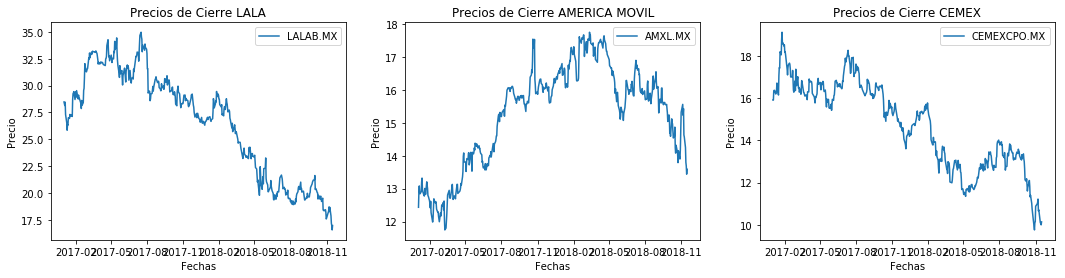

In [4]:
ticker1 = ['LALAB.MX']
ticker2 = ['AMXL.MX']
ticker3 = ['CEMEXCPO.MX']
start_date = '2017-01-01'
end_date = '2018-11-15'
closes_LALA = get_historical_closes(ticker1, start_date,end_date,freq='d')
closes_AM = get_historical_closes(ticker2, start_date,end_date,freq='d')
closes_CEMEX = get_historical_closes(ticker3, start_date,end_date,freq='d')
plt.figure(figsize = (18,4))
plt.subplot(131)
plt.plot(closes_LALA)
plt.title('Precios de Cierre LALA')
plt.xlabel('Fechas')
plt.ylabel('Precio')
plt.legend(ticker1)
plt.subplot(132)
plt.plot(closes_AM)
plt.title('Precios de Cierre AMERICA MOVIL')
plt.xlabel('Fechas')
plt.ylabel('Precio')
plt.legend(ticker2)
plt.subplot(133)
plt.plot(closes_CEMEX)
plt.title('Precios de Cierre CEMEX')
plt.xlabel('Fechas')
plt.ylabel('Precio')
plt.legend(ticker3)
plt.show()

## Rendimientos

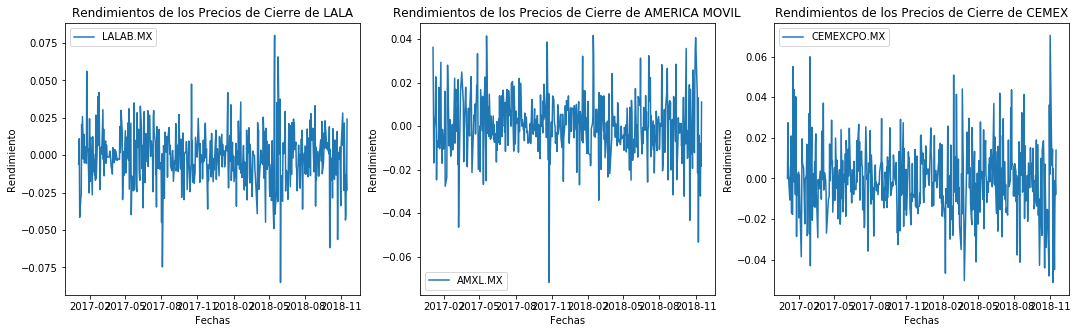

In [5]:
ret_LALA = calc_daily_ret(closes_LALA)
ret_AM = calc_daily_ret(closes_AM)
ret_CEMEX = calc_daily_ret(closes_CEMEX)
r1 = (.08/360) 
plt.figure(figsize = (18,5))
plt.subplot(131)
plt.plot(ret_LALA)
plt.title('Rendimientos de los Precios de Cierre de LALA')
plt.xlabel('Fechas')
plt.ylabel('Rendimiento')
plt.legend(ticker1)
plt.subplot(132)
plt.plot(ret_AM)
plt.title('Rendimientos de los Precios de Cierre de AMERICA MOVIL')
plt.xlabel('Fechas')
plt.ylabel('Rendimiento')
plt.legend(ticker2)
plt.subplot(133)
plt.plot(ret_CEMEX)
plt.title('Rendimientos de los Precios de Cierre de CEMEX')
plt.xlabel('Fechas')
plt.ylabel('Rendimiento')
plt.legend(ticker3)
plt.show()

## Prueba de Normalidad de los Rendimientos

Text(0.5,1,"['CEMEXCPO.MX']")

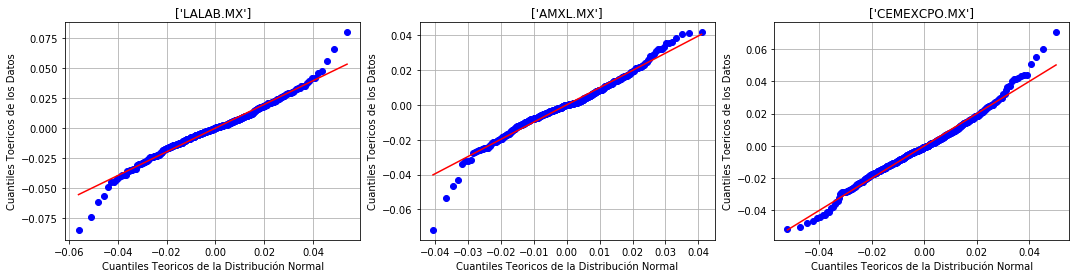

In [6]:
miu_LALA=st.norm.fit(ret_LALA)[0]
sig_LALA=st.norm.fit(ret_LALA)[1]
miu_AM=st.norm.fit(ret_AM)[0]
sig_AM=st.norm.fit(ret_AM)[1]
miu_CEMEX=st.norm.fit(ret_CEMEX)[0]
sig_CEMEX=st.norm.fit(ret_CEMEX)[1]
plt.figure(figsize = (18,4))
ax1 = plt.subplot(131)
Norm_LALA = st.probplot(ret_LALA['LALAB.MX'],sparams=(miu_LALA,sig_LALA), dist=st.norm, fit = True, plot=plt)
plt.grid()
plt.xlabel('Cuantiles Teoricos de la Distribución Normal')
plt.ylabel('Cuantiles Toericos de los Datos')
plt.title(ticker1)
ax2 = plt.subplot(132)
Norm_AM = st.probplot(ret_AM['AMXL.MX'],sparams=(miu_AM,sig_AM), dist=st.norm, fit = True, plot=plt)
plt.grid()
plt.xlabel('Cuantiles Teoricos de la Distribución Normal')
plt.ylabel('Cuantiles Toericos de los Datos')
plt.title(ticker2)
ax2 = plt.subplot(133)
Norm_CEMEX = st.probplot(ret_CEMEX['CEMEXCPO.MX'],sparams=(miu_CEMEX,sig_CEMEX), dist=st.norm, fit = True, plot=plt)
plt.grid()
plt.xlabel('Cuantiles Teoricos de la Distribución Normal')
plt.ylabel('Cuantiles Toericos de los Datos')
plt.title(ticker3)

## Opciones

## Valuación de Opciones

In [7]:
#Datos
Activos = np.array(['LALA','AMERICA MOVIL','CEMEX','LALA','AMERICA MOVIL','CEMEX'])
Ven = np.array(['2018-12-21','2018-12-21','2018-12-21','2018-12-21','2018-12-21','2018-12-21'])
Opt = np.array(['CALL','CALL','CALL','PUT','PUT','PUT'])
Spot = np.array([17.15,13.65,10.14,17.15,13.65,10.14])
Strike = np.array([22,15,10,16,12,9])
Merc = np.array([0.28,0.22,0.16,0.27,0.21,0.15])
valu = np.array(['2018-11-15','2018-11-15','2018-11-15','2018-11-15','2018-11-15','2018-11-15'])
dias = 36
#Valuación
LALA_bls = np.concatenate(bls_normal_diaria(closes_LALA.mean(),closes_LALA.std(),r1,Strike[0],Strike[3],Spot[0],dias))
AM_bls = np.concatenate(bls_normal_diaria(closes_AM.mean(),closes_AM.std(),r1,Strike[1],Strike[4],Spot[1],dias))
CEMEX_bls = np.concatenate(bls_normal_diaria(closes_CEMEX.mean(),closes_CEMEX.std(),r1,Strike[2],Strike[5],Spot[2],dias))
#Valuación para Intervalos de Confianza
n_dias = 36
n_tray = 10000
#T = 36/360
Confianza = 0.90
BS_LALA = Inter_BS(ret_LALA,closes_LALA,r1,Strike[0],Strike[3],n_dias,n_tray,'2018-11-15',Confianza)
BS_AM = Inter_BS(ret_AM,closes_AM,r1,Strike[1],Strike[4],n_dias,n_tray,'2018-11-15',Confianza)
BS_CEMEX = Inter_BS(ret_CEMEX,closes_CEMEX,r1,Strike[2],Strike[5],n_dias,n_tray,'2018-11-15',Confianza)
VAR_LALA = np.concatenate(Var_Call_Put(Spot[0],Strike[0],Strike[3],closes_LALA.std(),closes_LALA.mean(),dias/360,r1*360))
VAR_AM = np.concatenate(Var_Call_Put(Spot[1],Strike[1],Strike[4],closes_AM.std(),closes_AM.mean(),dias/360,r1*360))
VAR_CEMEX = np.concatenate(Var_Call_Put(Spot[2],Strike[2],Strike[5],closes_CEMEX.std(),closes_CEMEX.mean(),dias/360,r1*360))
#Tabla
bid = np.array([.22,.17,.12,.22,.17,.12])
ask = np.array([.33,.26,.18,.33,.26,.18])
bid_BS = np.array([LALA_bls[0] - 2*np.sqrt(VAR_LALA[0]), AM_bls[0] - 2*np.sqrt(VAR_AM[0]), CEMEX_bls[0] - 2*np.sqrt(VAR_CEMEX[0]), LALA_bls[1] - 2*np.sqrt(VAR_LALA[1]), AM_bls[1] - 2*np.sqrt(VAR_AM[1]), CEMEX_bls[1] - 2*np.sqrt(VAR_CEMEX[1])])
ask_BS = np.array([LALA_bls[0] + 2*np.sqrt(VAR_LALA[0]), AM_bls[0] + 2*np.sqrt(VAR_AM[0]), CEMEX_bls[0] + 2*np.sqrt(VAR_CEMEX[0]), LALA_bls[1] + 2*np.sqrt(VAR_LALA[1]), AM_bls[1] + 2*np.sqrt(VAR_AM[1]), CEMEX_bls[1] + 2*np.sqrt(VAR_CEMEX[1])])
BS = np.array([LALA_bls[0],AM_bls[0],CEMEX_bls[0],LALA_bls[1],AM_bls[1],CEMEX_bls[1]])
dif = np.abs(BS-Merc)
tabla = pd.DataFrame(columns=['Tipo','Fecha de Valuación','Vencimiento','Spot','Strike','Precio de Mercado','BID de Mercado','ASK de Mercado','Precio B-S','BID de  B-S','ASK de  B-S','Error'],index=Activos)
tabla.index.name = "Activos"
tabla['Tipo'] = Opt
tabla['Vencimiento'] = Ven
tabla['Spot'] = Spot
tabla['Strike'] = Strike
tabla['Precio de Mercado'] = np.round(Merc,2)
tabla['BID de Mercado'] = bid
tabla['ASK de Mercado'] = ask
tabla['Precio B-S'] = np.round(BS,2)
tabla['BID de  B-S'] = np.round(bid_BS,3)
tabla['ASK de  B-S'] = np.round(ask_BS,3)
tabla['Fecha de Valuación'] = valu
tabla['Error'] = np.round(dif,3)
tabla

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


,Tipo,Fecha de Valuación,Vencimiento,Spot,Strike,Precio de Mercado,BID de Mercado,ASK de Mercado,Precio B-S,BID de B-S,ASK de B-S,Error
Activos,,,,,,,,,,,,
LALA,CALL,2018-11-15,2018-12-21,17.15,22,0.28,0.22,0.33,0.12,0.101,0.146,0.157
AMERICA MOVIL,CALL,2018-11-15,2018-12-21,13.65,15,0.22,0.17,0.26,0.00,NaN,NaN,0.220
CEMEX,CALL,2018-11-15,2018-12-21,10.14,10,0.16,0.12,0.18,0.00,NaN,NaN,0.160
LALA,PUT,2018-11-15,2018-12-21,17.15,16,0.27,0.22,0.33,0.11,0.102,0.127,0.155
AMERICA MOVIL,PUT,2018-11-15,2018-12-21,13.65,12,0.21,0.17,0.26,0.00,-0.000,0.000,0.210
CEMEX,PUT,2018-11-15,2018-12-21,10.14,9,0.15,0.12,0.18,0.00,0.000,0.000,0.150


## Análisis de Volatilidades Implícitas

In [8]:
vol_imp_lala_call = bls_normal_diaria(closes_LALA.mean(),5.459,r1,Strike[0],Strike[3],Spot[0],36)[0]
vol_imp_am_call = bls_normal_diaria(closes_AM.mean(),2.475,r1,Strike[1],Strike[4],Spot[1],36)[0]
vol_imp_cemex_call = bls_normal_diaria(closes_CEMEX.mean(),2.642,r1,Strike[2],Strike[5],Spot[2],36)[0]
vol_imp_lala_put = bls_normal_diaria(closes_LALA.mean(),5.503,r1,Strike[0],Strike[3],Spot[0],36)[1]
vol_imp_am_put = bls_normal_diaria(closes_AM.mean(),2.477,r1,Strike[1],Strike[4],Spot[1],36)[1]
vol_imp_cemex_put = bls_normal_diaria(closes_CEMEX.mean(),2.676,r1,Strike[2],Strike[5],Spot[2],36)[1]

In [9]:
vol_exp = np.concatenate(np.array([closes_LALA.std(),closes_AM.std(),closes_CEMEX.std(),closes_LALA.std(),closes_AM.std(),closes_CEMEX.std()]))
vol_imp = [5.459,2.475,2.642,5.503,2.477,2.676]
err1 = np.round(abs(vol_exp-vol_imp),4)
tabla = pd.DataFrame(columns=['Volatilidad Explícita','Volatilidad Implícita','Diff. Volatilidades'],index=Activos)
tabla.index.name = "Activos"
tabla['Volatilidad Explícita'] = vol_exp
tabla['Volatilidad Implícita'] = vol_imp
tabla['Diff. Volatilidades'] = err1
tabla

,Volatilidad Explícita,Volatilidad Implícita,Diff. Volatilidades
Activos,,,
LALA,4.875,5.459,0.584
AMERICA MOVIL,1.525,2.475,0.950
CEMEX,2.052,2.642,0.590
LALA,4.875,5.503,0.628
AMERICA MOVIL,1.525,2.477,0.952
CEMEX,2.052,2.676,0.624


Se observa en la tabla anterior que todas las volatilidades implícitas son mayores que la explícitas. Lo anterior es un indicador que las opciones de los activos evaluados están sobrevaloradas, lo cual puede ser resultado de la excesiva especulación con dichos activos.

# Activos del New York Stock Exchange que Cotizan en el S&P 500

## Precios de Cierre US

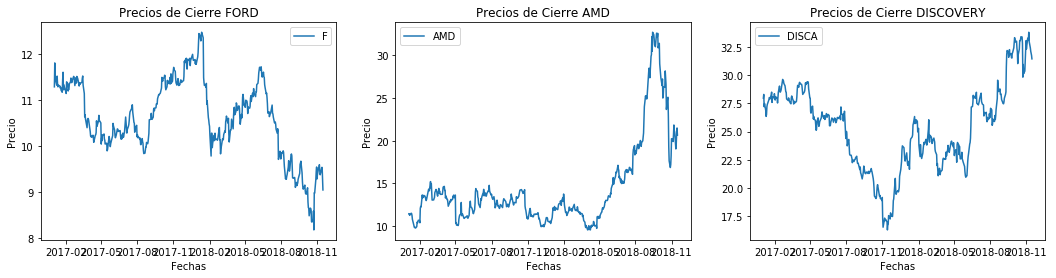

In [10]:
ticker4 = ['F']
ticker5 = ['AMD']
ticker6 = ['DISCA']
closes_FORD = get_historical_closes(ticker4, start_date,end_date,freq='d')
closes_AN = get_historical_closes(ticker5, start_date,end_date,freq='d')
closes_DIS = get_historical_closes(ticker6, start_date,end_date,freq='d')
plt.figure(figsize = (18,4))
plt.subplot(131)
plt.plot(closes_FORD)
plt.title('Precios de Cierre FORD')
plt.xlabel('Fechas')
plt.ylabel('Precio')
plt.legend(ticker4)
plt.subplot(132)
plt.plot(closes_AN)
plt.title('Precios de Cierre AMD')
plt.xlabel('Fechas')
plt.ylabel('Precio')
plt.legend(ticker5)
plt.subplot(133)
plt.plot(closes_DIS)
plt.title('Precios de Cierre DISCOVERY')
plt.xlabel('Fechas')
plt.ylabel('Precio')
plt.legend(ticker6)
plt.show()

## Rendimientos

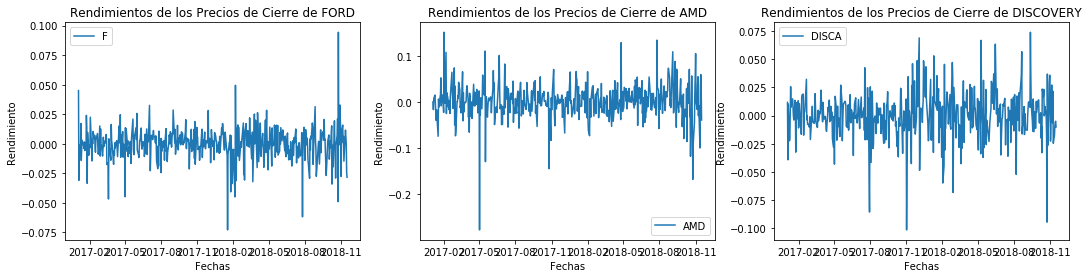

In [11]:
ret_FORD = calc_daily_ret(closes_FORD)
ret_AN = calc_daily_ret(closes_AN)
ret_DIS = calc_daily_ret(closes_DIS)
r2 = (.08/360) 
plt.figure(figsize = (18,4))
plt.subplot(131)
plt.plot(ret_FORD)
plt.title('Rendimientos de los Precios de Cierre de FORD')
plt.xlabel('Fechas')
plt.ylabel('Rendimiento')
plt.legend(ticker4)
plt.subplot(132)
plt.plot(ret_AN)
plt.title('Rendimientos de los Precios de Cierre de AMD')
plt.xlabel('Fechas')
plt.ylabel('Rendimiento')
plt.legend(ticker5)
plt.subplot(133)
plt.plot(ret_DIS)
plt.title('Rendimientos de los Precios de Cierre de DISCOVERY')
plt.xlabel('Fechas')
plt.ylabel('Rendimiento')
plt.legend(ticker6)
plt.show()

## Prueba de Normalidad de los Rendimientos

Text(0.5,1,"['DISCA']")

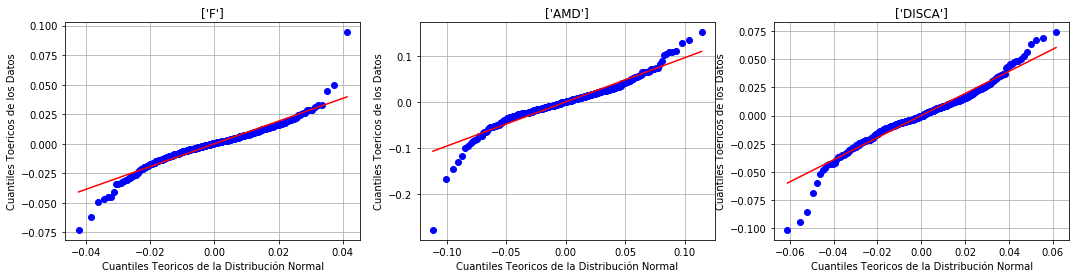

In [12]:
miu_FORD=st.norm.fit(ret_FORD)[0]
sig_FORD=st.norm.fit(ret_FORD)[1]
miu_AN=st.norm.fit(ret_AN)[0]
sig_AN=st.norm.fit(ret_AN)[1]
miu_DIS=st.norm.fit(ret_DIS)[0]
sig_DIS=st.norm.fit(ret_DIS)[1]
plt.figure(figsize = (18,4))
ax1 = plt.subplot(131)
Norm_FORD = st.probplot(ret_FORD['F'],sparams=(miu_FORD,sig_FORD), dist=st.norm, fit = True, plot=plt)
plt.grid()
plt.xlabel('Cuantiles Teoricos de la Distribución Normal')
plt.ylabel('Cuantiles Toericos de los Datos')
plt.title(ticker4)
ax2 = plt.subplot(132)
Norm_AN = st.probplot(ret_AN['AMD'],sparams=(miu_AN,sig_AN), dist=st.norm, fit = True, plot=plt)
plt.grid()
plt.xlabel('Cuantiles Teoricos de la Distribución Normal')
plt.ylabel('Cuantiles Toericos de los Datos')
plt.title(ticker5)
ax2 = plt.subplot(133)
Norm_DIS = st.probplot(ret_DIS['DISCA'],sparams=(miu_DIS,sig_DIS), dist=st.norm, fit = True, plot=plt)
plt.grid()
plt.xlabel('Cuantiles Teoricos de la Distribución Normal')
plt.ylabel('Cuantiles Toericos de los Datos')
plt.title(ticker6)

In [13]:
#Datos
Activos = np.array(['FORD','AMD','DISCOVERY','FORD','AMD','DISCOVERY'])
Ven = np.array(['2018-12-21','2018-12-21','2018-12-21','2018-12-21','2018-12-21','2018-12-21'])
Opt = np.array(['CALL','CALL','CALL','PUT','PUT','PUT'])
Spot = np.array([9.08,19,32,9.08,19,32])
Strike = np.array([19,20,35,8,18,25])
Merc = np.array([0.01,12.73,0.25,0.06,13.37,0.15])
valu = np.array(['2018-11-15','2018-11-15','2018-11-15','2018-11-15','2018-11-15','2018-11-15'])
#Valuación
FORD_bls = np.concatenate(bls_normal_diaria(closes_FORD.mean(),closes_FORD.std(),r2,Strike[0],Strike[3],Spot[0],36))
AN_bls = np.concatenate(bls_normal_diaria(closes_AN.mean(),closes_AN.std(),r2,Strike[1],Strike[4],Spot[1],36))
DIS_bls = np.concatenate(bls_normal_diaria(closes_DIS.mean(),closes_DIS.std(),r2,Strike[2],Strike[5],Spot[2],36))
#Valuación para Intervalos de Confianza
n_dias = 36
n_tray = 10000
Confianza = 0.90
BS_FORD = Inter_BS(ret_FORD,closes_FORD,r2,Strike[0],Strike[3],n_dias,n_tray,'2018-11-15',Confianza)
BS_AN = Inter_BS(ret_AN,closes_AN,r2,Strike[1],Strike[4],n_dias,n_tray,'2018-11-15',Confianza)
BS_DIS = Inter_BS(ret_DIS,closes_DIS,r2,Strike[2],Strike[5],n_dias,n_tray,'2018-11-15',Confianza)
VAR_FORD = np.concatenate(Var_Call_Put(Spot[0],Strike[0],Strike[3],closes_FORD.std(),closes_FORD.mean(),dias/360,r2*360))
VAR_AN = np.concatenate(Var_Call_Put(Spot[1],Strike[1],Strike[4],closes_AN.std(),closes_AN.mean(),dias/360,r2*360))
VAR_DIS = np.concatenate(Var_Call_Put(Spot[2],Strike[2],Strike[5],closes_DIS.std(),closes_DIS.mean(),dias/360,r2*360))
#Tabla
bid = np.array([0.00,11.79,0.10,0.04,12.70,0.11])
ask = np.array([0.02,13.10,0.35,0.07,14.25,0.30])
bid_BS = np.array([FORD_bls[0] - 2*np.sqrt(VAR_FORD[0]), AN_bls[0] - 2*np.sqrt(VAR_AN[0]), DIS_bls[0] - 2*np.sqrt(VAR_DIS[0]), FORD_bls[1] - 2*np.sqrt(VAR_FORD[1]), AN_bls[1] - 2*np.sqrt(VAR_AN[1]), DIS_bls[1] - 2*np.sqrt(VAR_DIS[1])])
ask_BS = np.array([FORD_bls[0] + 2*np.sqrt(VAR_FORD[0]), AN_bls[0] + 2*np.sqrt(VAR_AN[0]), DIS_bls[0] + 2*np.sqrt(VAR_DIS[0]), FORD_bls[1] + 2*np.sqrt(VAR_FORD[1]), AN_bls[1] + 2*np.sqrt(VAR_AN[1]), DIS_bls[1] + 2*np.sqrt(VAR_DIS[1])])
BS = np.array([FORD_bls[0],AN_bls[0],DIS_bls[0],FORD_bls[1],AN_bls[1],DIS_bls[1]])
dif = np.abs(BS-Merc)
tabla = pd.DataFrame(columns=['Tipo','Fecha de Valuación','Vencimiento','Spot','Strike','Precio de Mercado','BID de Mercado','ASK de Mercado','Precio B-S','BID de  B-S','ASK de  B-S','Error'],index=Activos)
tabla.index.name = "Activos"
tabla['Tipo'] = Opt
tabla['Vencimiento'] = Ven
tabla['Spot'] = Spot
tabla['Strike'] = Strike
tabla['Precio de Mercado'] = np.round(Merc,2)
tabla['BID de Mercado'] = bid
tabla['ASK de Mercado'] = ask
tabla['Precio B-S'] = np.round(BS,4)
tabla['BID de  B-S'] = np.round(bid_BS,3)
tabla['ASK de  B-S'] = np.round(ask_BS,3)
tabla['Fecha de Valuación'] = valu
tabla['Error'] = np.round(dif,3)
tabla

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


,Tipo,Fecha de Valuación,Vencimiento,Spot,Strike,Precio de Mercado,BID de Mercado,ASK de Mercado,Precio B-S,BID de B-S,ASK de B-S,Error
Activos,,,,,,,,,,,,
FORD,CALL,2018-11-15,2018-12-21,9.08,19,0.01,0.00,0.02,0.000,NaN,NaN,0.010
AMD,CALL,2018-11-15,2018-12-21,19.00,20,12.73,11.79,13.10,10.524,3.085,17.963,2.206
DISCOVERY,CALL,2018-11-15,2018-12-21,32.00,35,0.25,0.10,0.35,0.003,0.003,0.004,0.247
FORD,PUT,2018-11-15,2018-12-21,9.08,8,0.06,0.04,0.07,0.000,-0.000,0.000,0.060
AMD,PUT,2018-11-15,2018-12-21,19.00,18,13.37,12.70,14.25,9.890,4.980,14.799,3.480
DISCOVERY,PUT,2018-11-15,2018-12-21,32.00,25,0.15,0.11,0.30,0.003,0.002,0.003,0.147


In [14]:
vol_imp_ford_call = bls_normal_diaria(closes_FORD.mean(),1.768,r2,Strike[0],Strike[3],Spot[0],36)[0]
vol_imp_an_call = bls_normal_diaria(closes_AN.mean(),6.787,r2,Strike[1],Strike[4],Spot[1],36)[0]
vol_imp_dis_call = bls_normal_diaria(closes_DIS.mean(),4.690,r2,Strike[2],Strike[5],Spot[2],36)[0]
vol_imp_ford_put = bls_normal_diaria(closes_FORD.mean(),1.958,r2,Strike[0],Strike[3],Spot[0],36)[1]
vol_imp_an_put = bls_normal_diaria(closes_AN.mean(),6.575,r2,Strike[1],Strike[4],Spot[1],36)[1]
vol_imp_dis_put = bls_normal_diaria(closes_DIS.mean(),4.613,r2,Strike[2],Strike[5],Spot[2],36)[1]

In [15]:
vol_exp = np.concatenate(np.array([closes_FORD.std(),closes_AN.std(),closes_DIS.std(),closes_FORD.std(),closes_AN.std(),closes_DIS.std()]))
vol_imp = [1.768,6.787,4.690,1.958,6.575,4.613]
err2 = np.round(abs(vol_exp-vol_imp),4)
tabla = pd.DataFrame(columns=['Volatilidad Explícita','Volatilidad Implícita','Diff. Volatilidades'],index=Activos)
tabla.index.name = "Activos"
tabla['Volatilidad Explícita'] = vol_exp
tabla['Volatilidad Implícita'] = vol_imp
tabla['Diff. Volatilidades'] = err2
tabla

,Volatilidad Explícita,Volatilidad Implícita,Diff. Volatilidades
Activos,,,
FORD,0.832,1.768,0.936
AMD,5.074,6.787,1.713
DISCOVERY,3.792,4.690,0.898
FORD,0.832,1.958,1.126
AMD,5.074,6.575,1.501
DISCOVERY,3.792,4.613,0.821


Se observa en la tabla anterior que todas las volatilidades implícitas son mayores que la explícitas. Lo anterior es un indicador que las opciones de los activos evaluados están sobrevaloradas, lo cual puede ser resultado de la excesiva especulación con dichos activos.

## Comparación de Índices

In [16]:
tabla = pd.DataFrame(columns=['Diff. Volatilidades IPC','Diff. Volatilidades S&P 500'])
tabla['Diff. Volatilidades IPC'] = err1
tabla['Diff. Volatilidades S&P 500'] = err2
tabla

,Diff. Volatilidades IPC,Diff. Volatilidades S&P 500
0,0.584,0.936
1,0.950,1.713
2,0.590,0.898
3,0.628,1.126
4,0.952,1.501
5,0.624,0.821


In [17]:
print('Promedio de diferencias entre volatilidades IPC')
print(err1.mean())
print('Promedio de diferencias entre volatilidades S&P 500')
print(err2.mean())

Promedio de diferencias entre volatilidades IPC
0.7215333333333334
Promedio de diferencias entre volatilidades S&P 500
1.1658


## Limitaciones del modelo
El modelo calcula el precio para opciones que solo se pueden ejercer o liquidar al vencimiento, las opciones estadounidenses se pueden ejercer antes del vencimiento, así mismo se asume que nos e pagan dividendos y que la tasa libre de riesgo y volatilidad son constantes. 